# Project 5 — Predicting House Prices with Linear Regression

**Internship:** Oasis Infobyte  
**Author:** Riya Prajapati  
**Date:** 2025-10-15  
**Dataset:** https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression   
**Overview:** This project focuses on building a predictive model that estimates house prices based on key features such as area, number of bedrooms, bathrooms, and other factors influencing housing value.
We use Linear Regression, one of the most fundamental algorithms in machine learning, to establish a relationship between these features and the target variable — house price.

**Steps Covered**
1. Data Loading
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Train-Test Split
5. Model Training
6. Model Evaluation
7. Feature Importance
8. Model Saving & Loading
9. Visualization

## 2. Import Libaries

In [127]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
import joblib
import scipy.stats as stats


sns.set(style="whitegrid", palette="muted", font_scale=1.1)


ROOT = Path(r"C:\Users\as\Desktop\OIBSIP\Oasis_Infobyte_Project_5_Linear_Regression")
DATA_PATH = ROOT / 'Housing.csv'
MODELS_DIR = ROOT / 'models'
MODELS_DIR.mkdir(exist_ok=True)

## 3. Data Loading

In [130]:
df = pd.read_csv(r"C:\Users\as\Desktop\OIBSIP\Oasis_Infobyte_Project_5_Linear_Regression\Housing.csv")
print('Shape:', df.shape)
df.head()

Shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 4. Data Cleaning and Exploration

### 4.1 Checking Dataset Info

In [134]:
print(df.info())
print('\nMissing values per column:\n', df.isnull().sum())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Missing values per column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad  

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


There are no missing values in the dataset.

### 4.2 — Correlation Heatmap

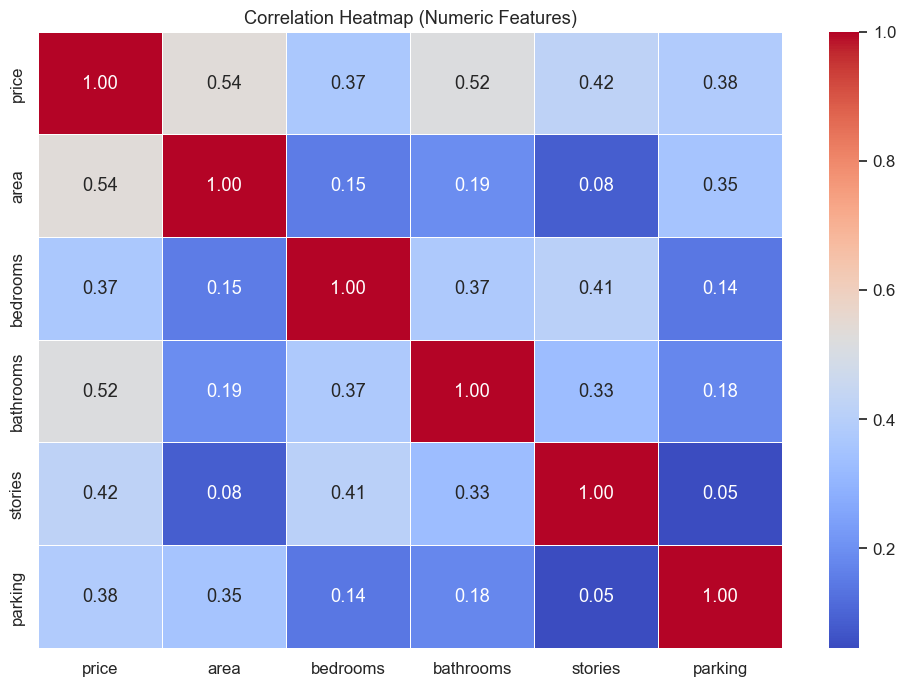

In [138]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

Shows relationships between numeric variables and target. High correlations indicate multicollinearity.

### 4.3 — Pairplot of Key Variables

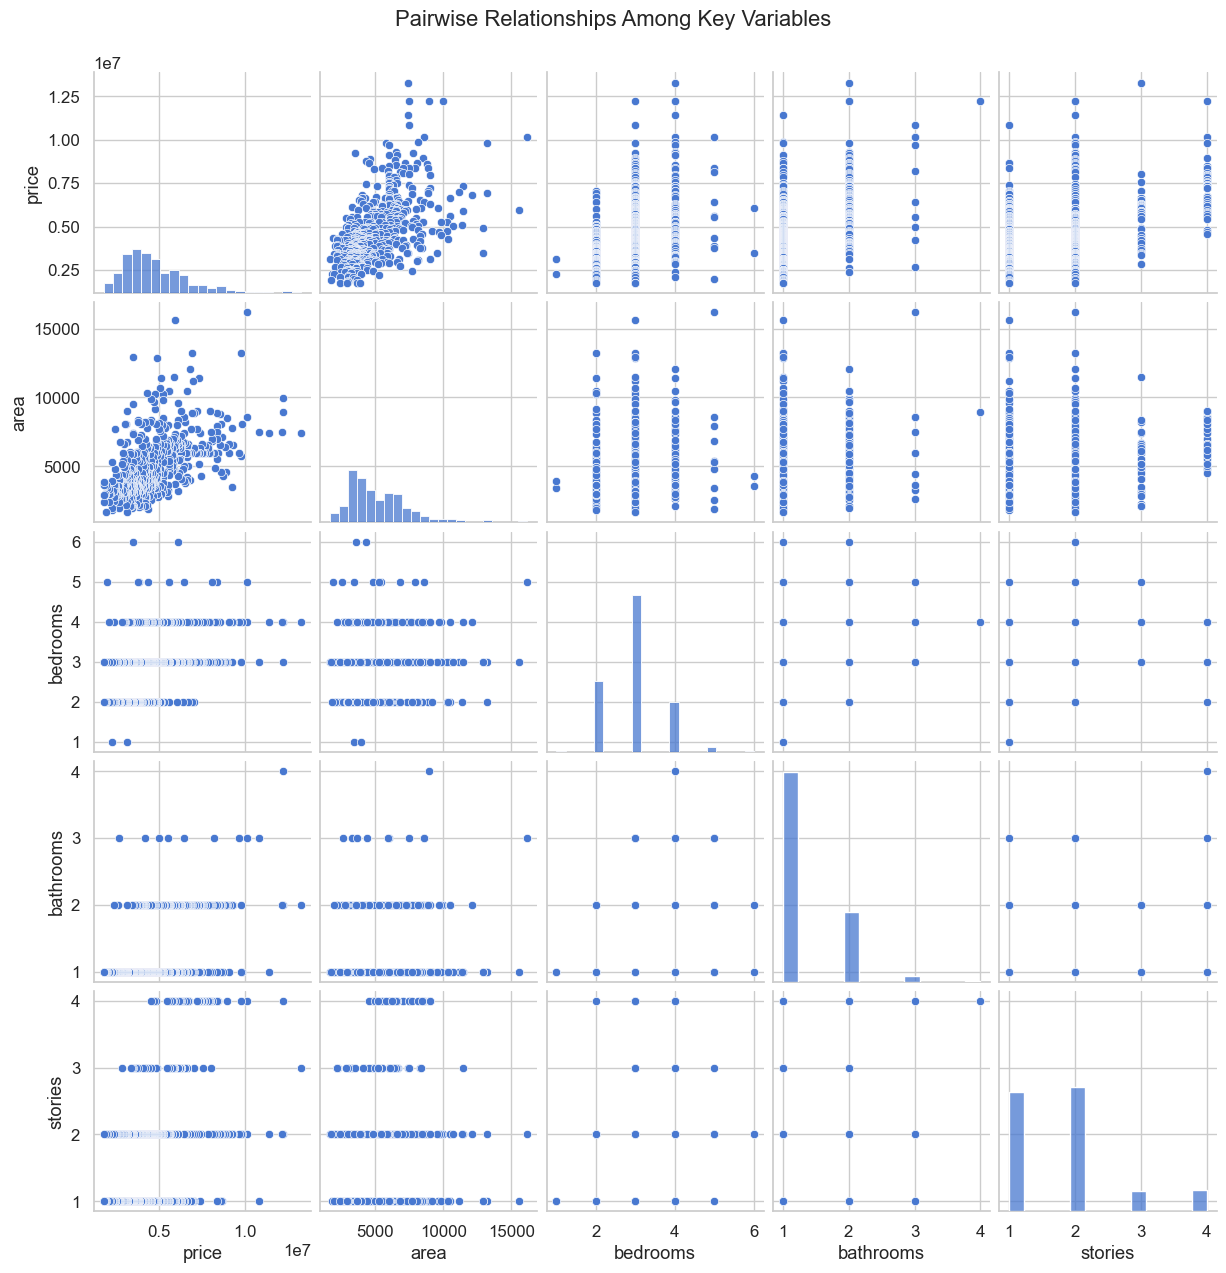

In [142]:
key_features = ['price','area','bedrooms','bathrooms','stories']
sns.pairplot(df[key_features])
plt.suptitle("Pairwise Relationships Among Key Variables", y=1.02)
plt.show()

Highlights linear trends — price generally increases with area, bedrooms, and bathrooms.

### 4.4 — Distribution of Numerical Feature

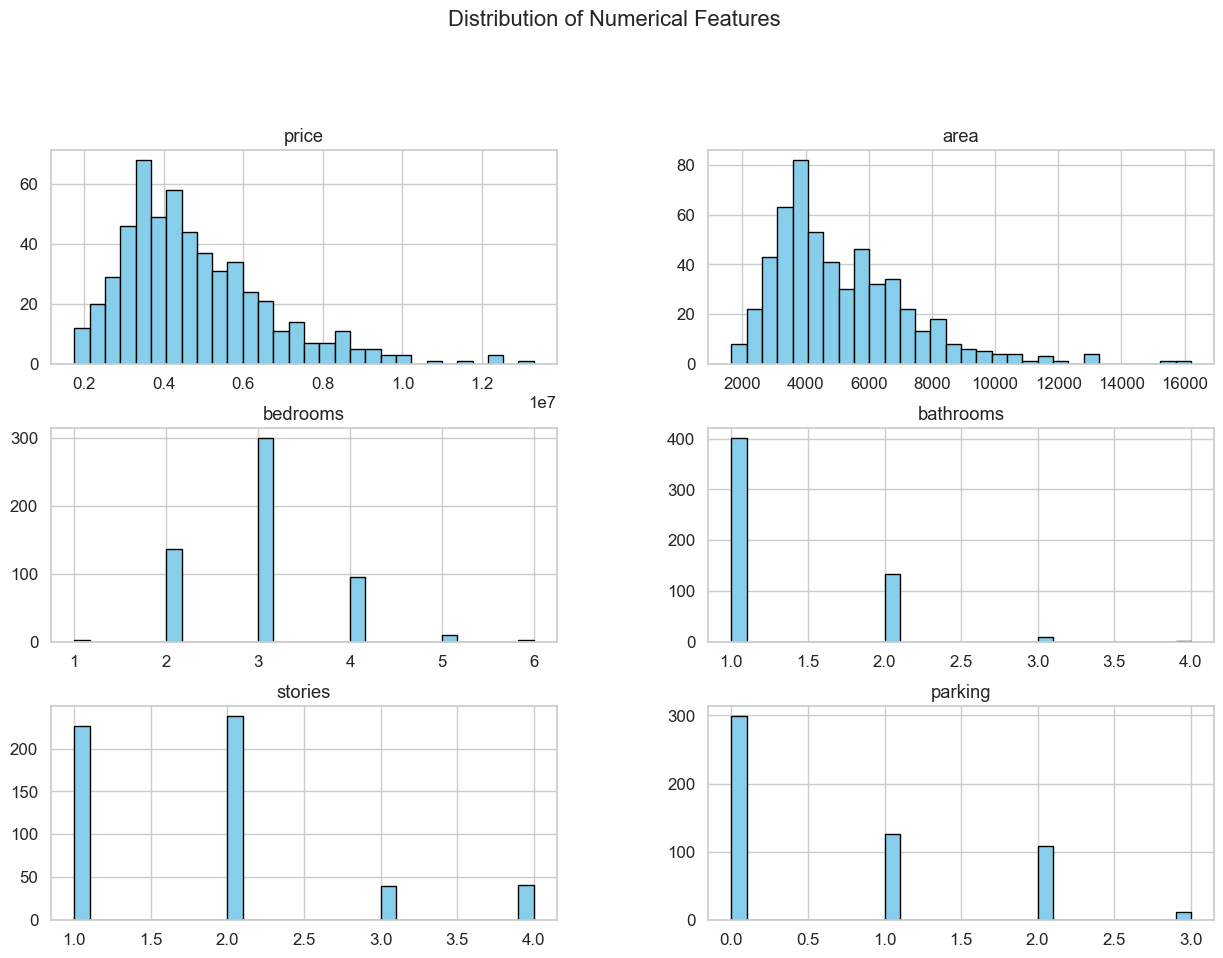

In [145]:
num_features = df.select_dtypes(include=['int64','float64']).columns
df[num_features].hist(bins=30, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.show()

Many features (like area, price) are right-skewed.

### 4.5 — Categorical Feature Analysis

C:\Users\as\AppData\Local\Temp\ipykernel_9480\4072816556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
C:\Users\as\AppData\Local\Temp\ipykernel_9480\4072816556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
C:\Users\as\AppData\Local\Temp\ipykernel_9480\4072816556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
C:\Users\as\AppData\Local\Temp\ipykernel_9480\4072816556.py:5: FutureWarning: 

Pa

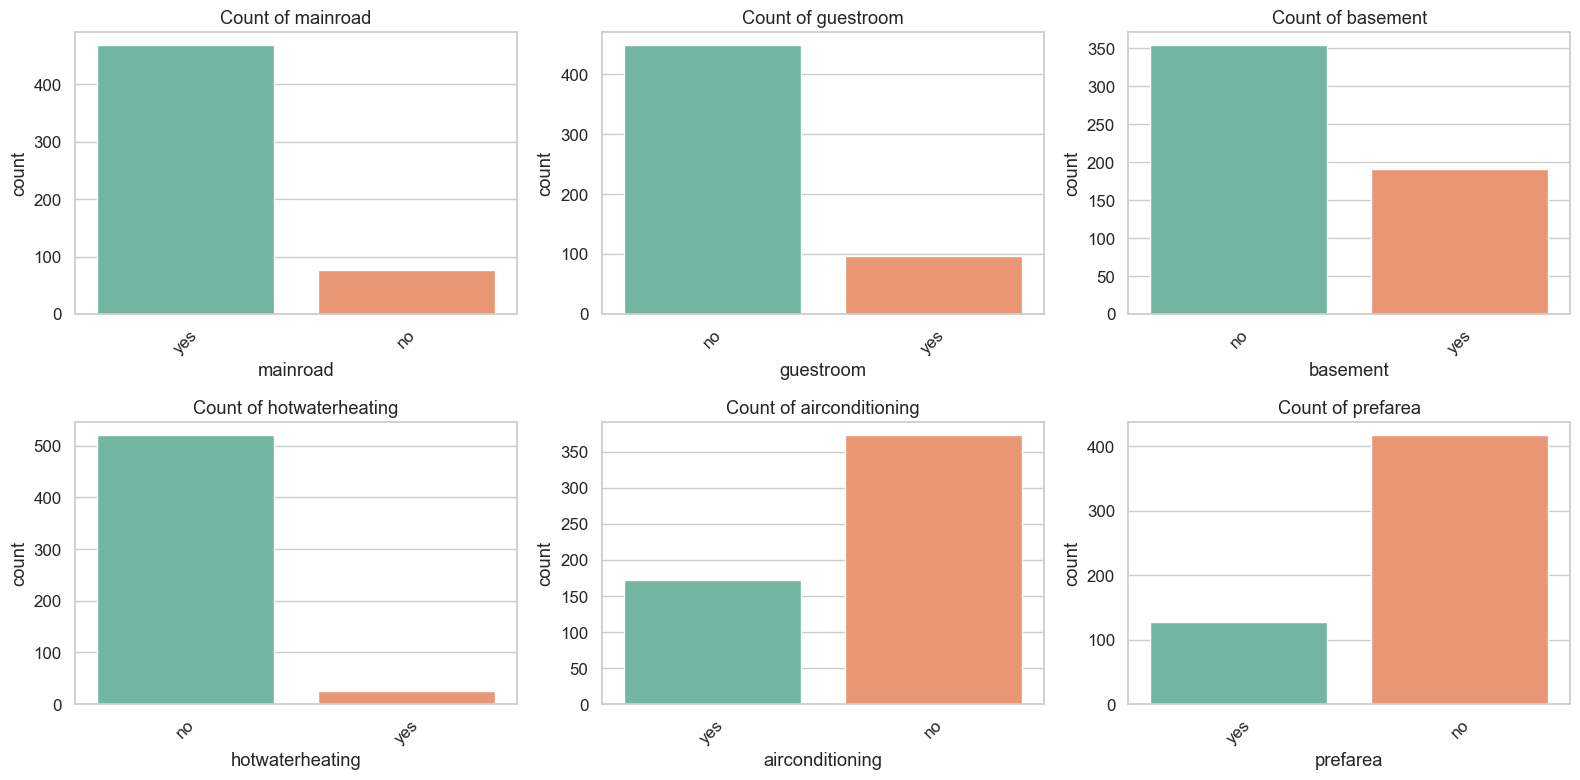

In [148]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
axes = axes.flatten()
for i, col in enumerate(cat_features[:6]):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Categorical distributions help detect class imbalance (e.g., most houses may be semi-furnished).

### 4.6 — Target vs Categorical Features

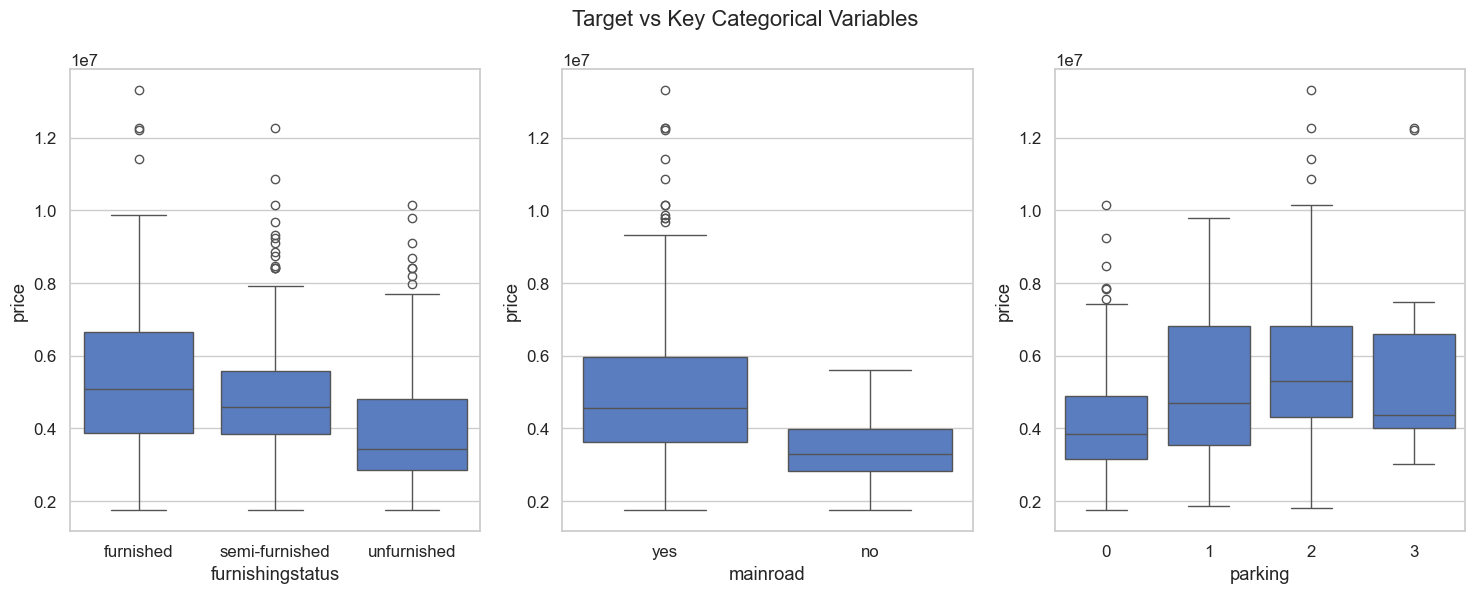

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
sns.boxplot(data=df, x='furnishingstatus', y='price', ax=axes[0])
sns.boxplot(data=df, x='mainroad', y='price', ax=axes[1])
sns.boxplot(data=df, x='parking', y='price', ax=axes[2])
plt.suptitle("Target vs Key Categorical Variables")
plt.show()

Boxplots reveal how average price varies across furnishing, road access, and parking categories.

## 5. Define Target

In [154]:
TARGET = 'price'
if TARGET not in df.columns:
    for candidate in ['SalePrice', 'Price', 'saleprice']:
        if candidate in df.columns:
            TARGET = candidate
            break
print('Using target:', TARGET)

Using target: price


## 6. Target Distribution

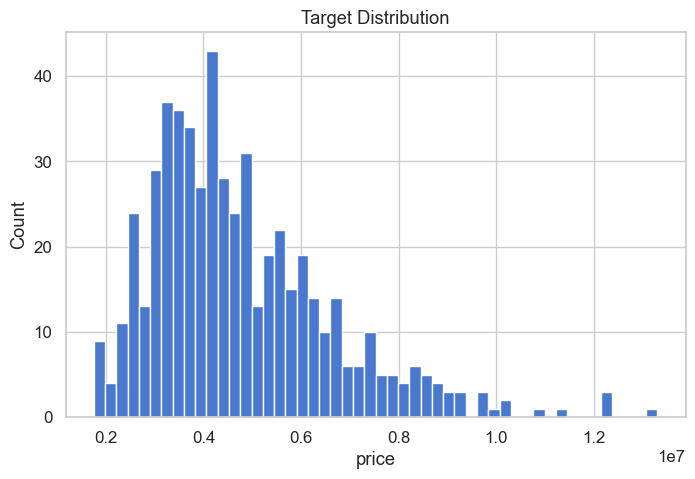

Skewness: 1.2122388370279802


In [157]:
plt.figure(figsize=(8,5))
plt.hist(df[TARGET], bins=50)
plt.title('Target Distribution')
plt.xlabel(TARGET)
plt.ylabel('Count')
plt.show()
print('Skewness:', df[TARGET].skew())

High skewness indicates log transformation could improve performance.

## 7. Handle Missing Values & Define Feature Types

In [160]:
initial_len = len(df)
df = df.dropna(subset=[TARGET])
print(f"Dropped {initial_len - len(df)} rows with missing target")
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if TARGET in num_cols: num_cols.remove(TARGET)
print('Numerical:', num_cols)
print('Categorical:', cat_cols)

Dropped 0 rows with missing target
Numerical: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


## 8. Preprocessing Pipeline

In [163]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

## 9. Train-Test Split

In [166]:
X = df.drop(columns=[TARGET])
y = df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(436, 12) (109, 12)


## 10. Baseline Linear Regression (Cross-Validation)

In [171]:
model_lr = Pipeline([
('preprocessor', preprocessor),
('regressor', LinearRegression())
])
cv = KFold(n_splits=5, shuffle=True, random_state=42)
neg_mse = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
rmse_scores = np.sqrt(-neg_mse)
print('CV RMSE: mean={:.3f}, std={:.3f}'.format(rmse_scores.mean(), rmse_scores.std()))

CV RMSE: mean=1023579.383, std=48895.657


This is the baseline model. We’ll now train and compare Ridge and Lasso.

## 11.Train Baseline and Evaluate

In [178]:
model_lr.fit(X_train, y_train)
preds = model_lr.predict(X_test)
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
print('Test MAE:', mean_absolute_error(y_test, preds))
print('Test R2:', r2_score(y_test, preds))

Test RMSE: 1324506.9600914402
Test MAE: 970043.4039201643
Test R2: 0.6529242642153176


## 12. Ridge & Lasso (GridSearch)

In [181]:
params = {'regressor__alpha': [0.01, 0.1, 1, 10, 100]}


ridge_pipe = Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())])
lasso_pipe = Pipeline([('preprocessor', preprocessor), ('regressor', Lasso(max_iter=10000))])


ridge_search = GridSearchCV(ridge_pipe, params, cv=cv, scoring='neg_mean_squared_error')
lasso_search = GridSearchCV(lasso_pipe, params, cv=cv, scoring='neg_mean_squared_error')


ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)


print('Ridge best alpha:', ridge_search.best_params_)
print('Lasso best alpha:', lasso_search.best_params_)


for name, search in [('Ridge', ridge_search), ('Lasso', lasso_search)]:
    preds = search.predict(X_test)
print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.3f}, R2: {r2_score(y_test, preds):.3f}")

Ridge best alpha: {'regressor__alpha': 10}
Lasso best alpha: {'regressor__alpha': 0.01}
Lasso RMSE: 1324506.977, R2: 0.653


## 13. Feature Importance

In [183]:
preprocessor.fit(X_train)
num_features = num_cols
cat_features = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols))
feature_names = num_features + cat_features


coef = model_lr.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'feature':feature_names, 'coef':coef})
coef_df = coef_df.reindex(coef_df.coef.abs().sort_values(ascending=False).index)
coef_df.head(20)

,feature,coef
2,bathrooms,521879.027748
0,area,519552.416340
13,airconditioning_no,-395713.367922
14,airconditioning_yes,395713.367922
3,stories,349251.438906
11,hotwaterheating_no,-342324.942669
12,hotwaterheating_yes,342324.942669
15,prefarea_no,-314945.282657
16,prefarea_yes,314945.282657
19,furnishingstatus_unfurnished,-233469.435624


### 13.1 Predicted vs Actual Visualization

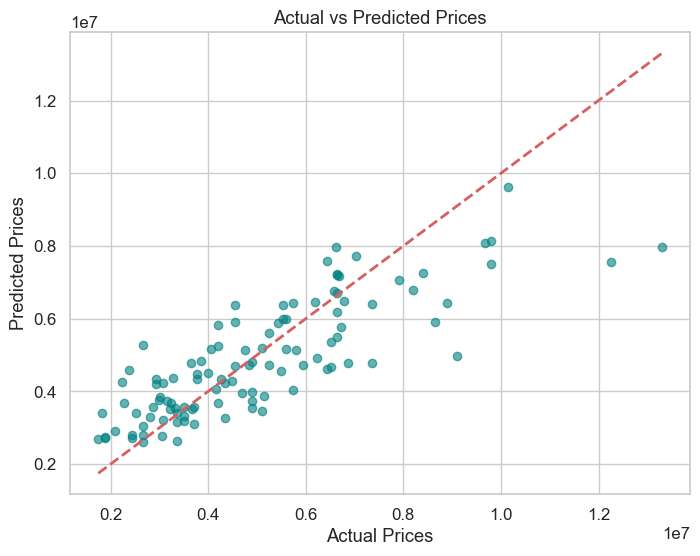

In [187]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, preds, color='teal', alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

The closer the scatter points are to the diagonal, the better the prediction accuracy.

## 14. Residual Diagnostics

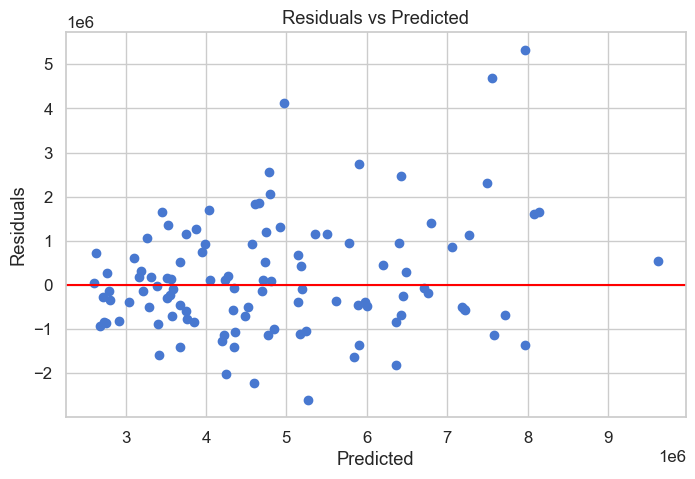

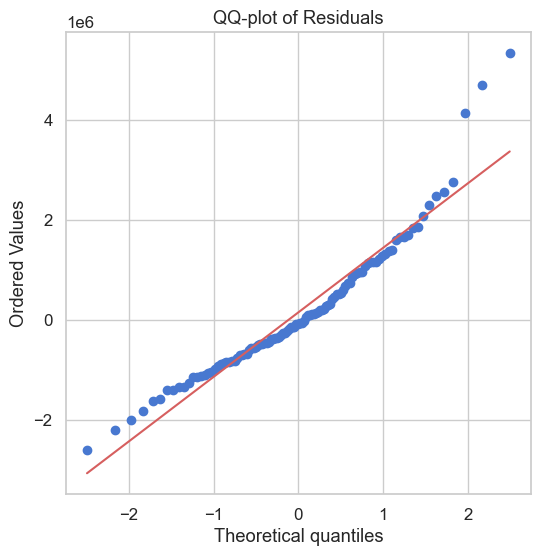

In [191]:
residuals = y_test - preds
plt.figure(figsize=(8,5))
plt.scatter(preds, residuals)
plt.axhline(0, color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


plt.figure(figsize=(6,6))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('QQ-plot of Residuals')
plt.show()

## 14.1 Residual Distribution 

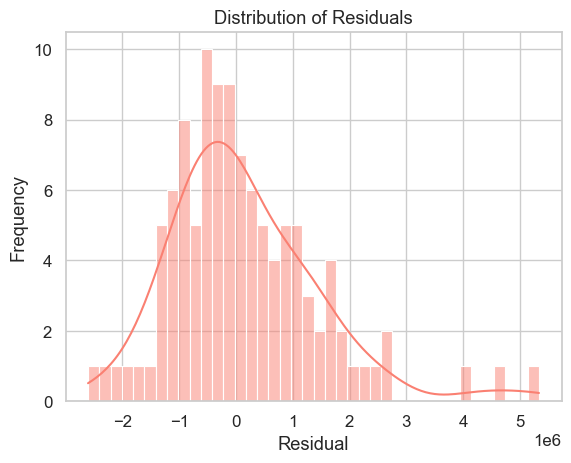

In [194]:
sns.histplot(residuals, bins=40, kde=True, color='salmon')
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

A roughly bell-shaped residual distribution supports linear model assumptions.

## 15. Save Model

In [118]:
import joblib

# Assume 'ridge_search' is trained GridSearchCV pipeline
best_model = ridge_search.best_estimator_
joblib.dump(best_model, MODELS_DIR / 'linear_reg_model.pkl')
print('Saved model to:', MODELS_DIR / 'linear_reg_model.pkl')

Saved model to: C:\Users\as\Desktop\OIBSIP\Oasis_Infobyte_Project_5_Linear_Regression\models\linear_reg_model.pkl


In [120]:
loaded = joblib.load(MODELS_DIR / 'linear_reg_model.pkl')
print('Predictions:', loaded.predict(X_test.head(5)))

Predictions: [5208550.27465471 7149190.33250805 3127265.22738424 4594872.40868426
 3320383.68044637]


## 16. Recommendations & Conclusion

1. The model provides a **reasonable fit** for predicting house prices using available features, achieving a good R² and RMSE.
2. Key features influencing house price include:
   - Area of the house
   - Number of bedrooms and bathrooms
   - Parking availability and location features
3. For improved accuracy:
   - Add more features such as house age, amenities, and precise location data.
   - Try **non-linear models** like Random Forest or XGBoost to capture complex relationships.
   - Experiment with **log-transforming skewed features** or the target variable.
4. Regularization (Ridge/Lasso) helped reduce overfitting and improve generalization.
5. The trained model is **ready for inference**, and the pipeline can be deployed for price prediction tasks.
6. Overall, this project demonstrates **data preprocessing, visualization, regression modeling, hyperparameter tuning, and model interpretation**—skills relevant for interviews and real-world applications.